In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from sklearn.decomposition import PCA
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from scipy.linalg import cholesky
from tqdm import tqdm_notebook as tqdm
from datetime import datetime, timedelta
from arch import arch_model

In [4]:
ir = pd.read_excel('Облигации/история_кривые_доходностей.xlsx', index_col=0, header=1) / 100 / 252

dates_bonds = np.array(['-'.join(x.split('.')[::-1]) for x in ir.index]).astype('M8[D]')
ir.set_index(dates_bonds, inplace=True)
ir.sort_index(inplace=True)
ir_diff = ir.diff().dropna() # берем разности
dates_bonds = dates_bonds[::-1][1:]

n_components = 3
pca = PCA(n_components=n_components)
components = pca.fit_transform(ir_diff)


Text(0.5,1,'Zero-coupon yield curve')

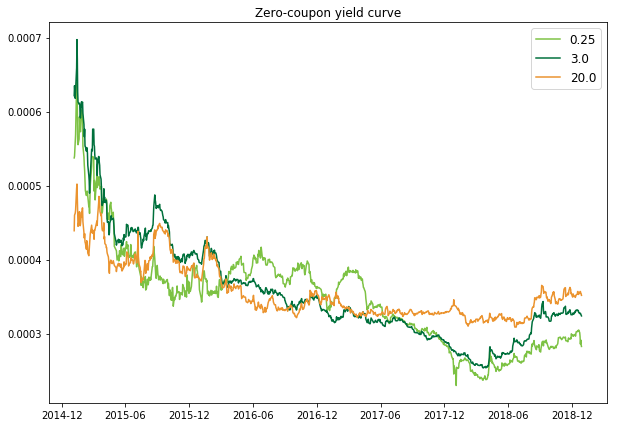

In [22]:
colors = ['#7dc244', '#00703c', '#eb932e']

plt.figure(figsize=(10, 7))


for i, l in enumerate(ir.columns[::5]):
    plt.plot(ir[l], c=colors[i], label=l)
    
plt.legend(prop={'size': 12})
plt.title('Zero-coupon yield curve' , size='12')

Text(0.5,1,'Zero-coupon yield curve difference')

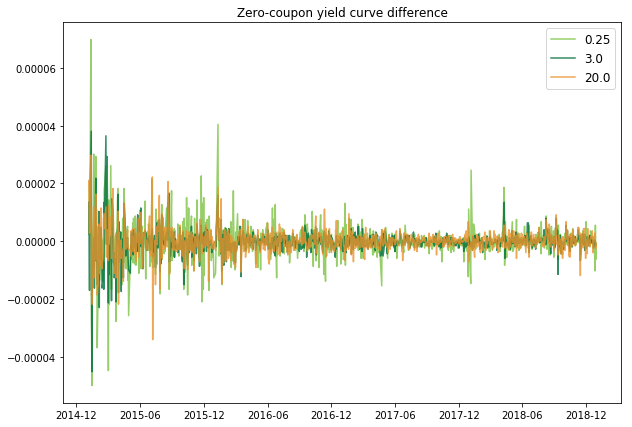

In [23]:
colors = ['#7dc244', '#00703c', '#eb932e']

plt.figure(figsize=(10, 7))


for i, l in enumerate(ir.columns[::5]):
    plt.plot(ir_diff[l], c=colors[i], label=l, alpha=0.8)
    
plt.legend(prop={'size': 12})
plt.title('Zero-coupon yield curve difference' , size='12')

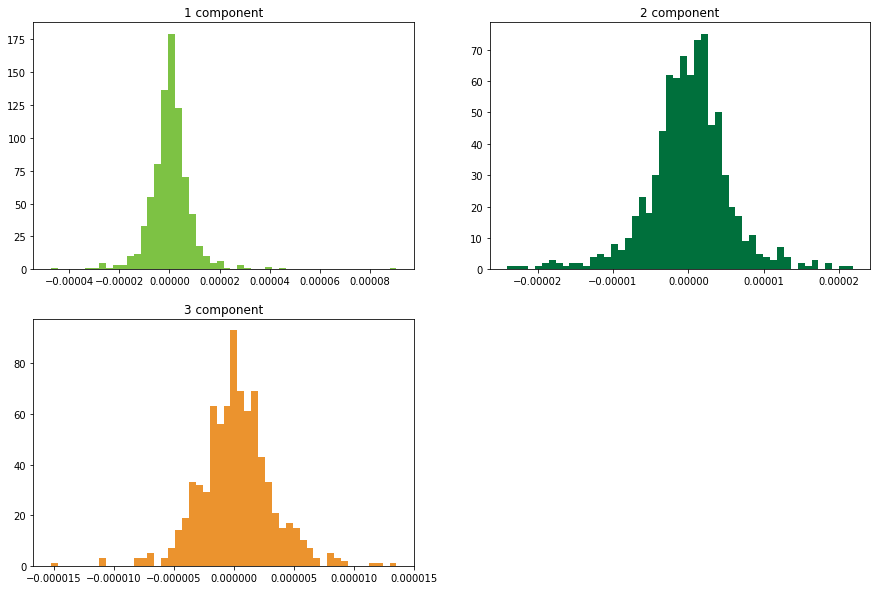

In [34]:
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(2,2,i+1)
    plt.hist(components[200:, i], color=colors[i], bins=50)
    plt.title('{} component'.format(i+1))